In [234]:
#! /usr/bin/env python

# Load useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io

from datetime import datetime, timedelta



# 1. Probability Density Function

In [235]:
# 1. Load data from a .mat
mooring = scipy.io.loadmat('./web/current.mat')


time = mooring['time'][0]
u = mooring['u'][0]
v = mooring['v'][0]
N = len(time)


In [236]:


date0 = datetime(1,1,1) + timedelta(time[0])
print(date0.strftime("%d %B %Y"))

time-=time[0]

27 April 2015


In [237]:
time.shape

(69990,)

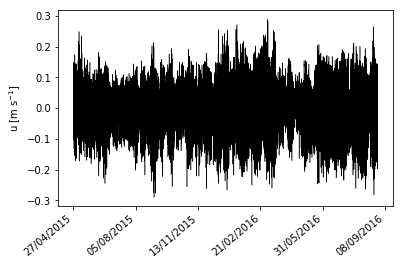

In [238]:

# 2. plot time serie of u and v
fig = plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(time,u,'-k',linewidth=.5);
#plt.xlabel('days'); 
plt.ylabel('u [m s$^{-1}$]')

#########
days = range(0,600,100)
ax.set_xticks(days);
dates = [date0 + timedelta(days[i]) for i in range(len(days))]
ax.set_xticklabels([dates[i].strftime("%d/%m/%Y")  for i in range(len(days))])
#########

fig.autofmt_xdate(bottom=0.2, rotation=40, ha='right')


0.07563381014454117 -0.002507215316473782


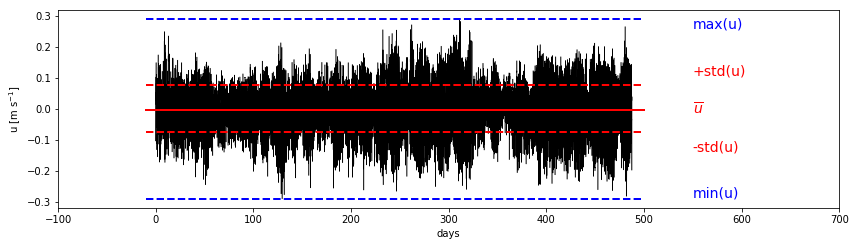

In [239]:
# 2. plot time serie of u and v
plt.figure(figsize=(14.0,8.0))

plt.subplot(2,1,1)
plt.plot(time,u,'-k',linewidth=.5);
plt.plot([-10,500],[np.mean(u),np.mean(u)],'-r',linewidth=2.);
plt.xlim([-100,700]); plt.text(550,0,r'$\overline{u}$',color='r',fontsize=14,verticalalignment='center')

plt.plot([-10,500],[np.std(u),np.std(u)],'--r',linewidth=2.);
plt.xlim([-100,700]); plt.text(550,0.10,r'+std(u)',color='r',fontsize=14,verticalalignment='bottom')

plt.plot([-10,500],[-np.std(u),-np.std(u)],'--r',linewidth=2.);
plt.xlim([-100,700]); plt.text(550,-0.10,r'-std(u)',color='r',fontsize=14,verticalalignment='top')


plt.plot([-10,500],[np.max(u),np.max(u)],'--b',linewidth=2.);
plt.xlim([-100,700]); plt.text(550,0.25,r'max(u)',color='b',fontsize=14,verticalalignment='bottom')

plt.plot([-10,500],[np.min(u),np.min(u)],'--b',linewidth=2.);
plt.xlim([-100,700]); plt.text(550,-0.25,r'min(u)',color='b',fontsize=14,verticalalignment='top')

plt.xlabel('days'); plt.ylabel('u [m s$^{-1}$]')

print np.std(u), np.mean(u)

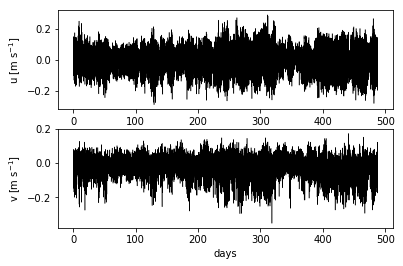

In [240]:
# 2. plot time serie of u and v
plt.subplot(2,1,1)
plt.plot(time,u,'-k',linewidth=.5);
plt.xlabel('days'); plt.ylabel('u [m s$^{-1}$]')
plt.subplot(2,1,2)
plt.plot(time,v,'-k',linewidth=.5);
plt.xlabel('days'); plt.ylabel('v [m s$^{-1}$]')
plt.show()

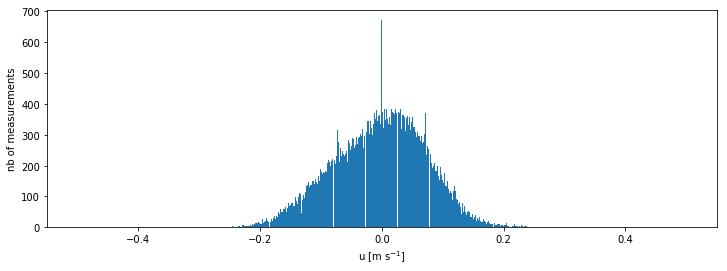

In [241]:
# 3. Histogram of u
plt.figure(figsize=(12.0,4.0))
bins = np.arange(-.5,.501,0.001)
plt.hist(u,bins);
plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('nb of measurements')
plt.show()

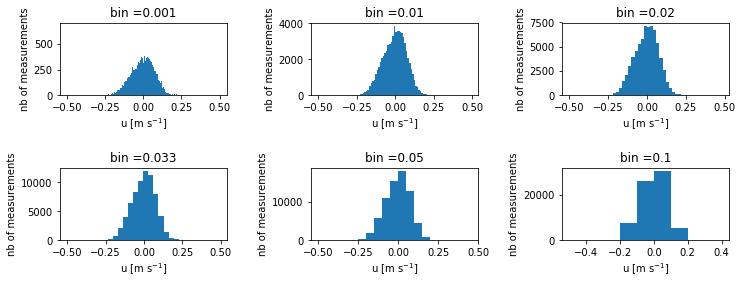

bin width 0.03386982752572642


In [242]:
# 4. Try with different bin widths
binwidth = [0.001,0.01,0.02,0.033,0.05,0.1]
plt.figure(figsize=(12.0,4.0))
for i in range(6):
    plt.subplot(2,3,i+1)
    bins = np.arange(-.5,.5,binwidth[i])
    plt.hist(u,bins);
    plt.title('bin =' + format(binwidth[i]))
    plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('nb of measurements')

plt.subplots_adjust(wspace=.5,hspace=1.)
plt.show()

'''
Note that the bin width is critical.
A rule of thumb is to use a number of bins : 1 + log_2(N)

so that bin_width is bin_with = (u.max() - u.min()) / (1 + np.log2(N))
'''

print 'bin width', (u.max() - u.min()) / (1 + np.log2(N))

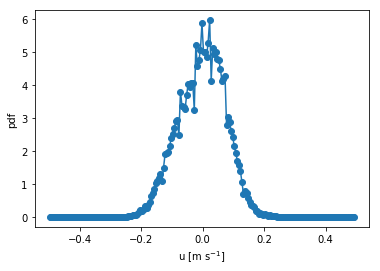

1.0

In [243]:
# 5. let's normalize the histogram to get the pdf

# First make a histogram as previously (nb of measurements in each bin)
bins = np.arange(-.5,.5,0.005)
pdf, _ = np.histogram(u,bins)

# Then divide by the total number of measurements to get a probability
pdf = pdf*1./N

# Finally divide by the bin width to get a probability density
pdf = pdf/(bins[2]-bins[1])

# Plot the result
x= 0.5*(bins[:-1]+bins[1:])
plt.plot(x,pdf,'-o');
plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('pdf')
plt.show()

np.sum(pdf*(bins[2]-bins[1]))


In [244]:
# 6. define a function to compute a pdf
def mypdf(u,bins):
    pdf, _ = np.histogram(u,bins)
    pdf = pdf / ((bins[2]-bins[1])*len(u))
    return pdf

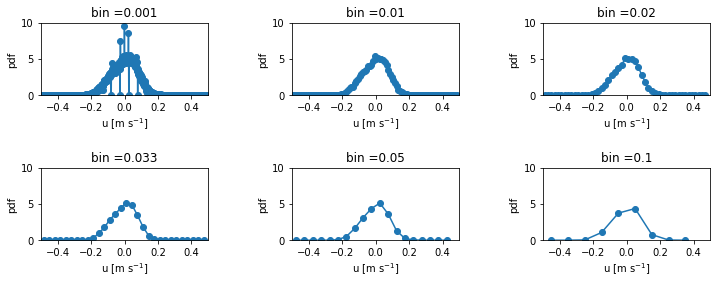

In [245]:
# test it with different bin widths and check that the amplitude doesn't vary with the bin-width
binwidth = [0.001,0.01,0.02,0.033,0.05,0.1]
plt.figure(figsize=(12.0,4.0))
for i in range(6):
    plt.subplot(2,3,i+1)
    bins = np.arange(-.5,.5,binwidth[i])
    pdf = mypdf(u,bins)
    plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
    plt.axis([-0.5,0.5,0,10])
    plt.title('bin =' + format(binwidth[i]))
    plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('pdf')

plt.subplots_adjust(wspace=.5,hspace=1.)
plt.show()


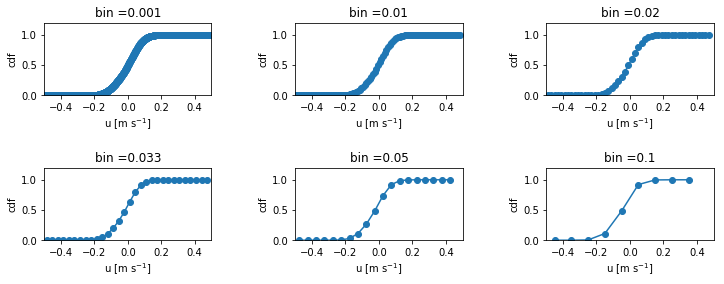

In [246]:
# 7. Compute the cumulative distribution function
binwidth = [0.001,0.01,0.02,0.033,0.05,0.1]
plt.figure(figsize=(12.0,4.0))
for i in range(6):
    plt.subplot(2,3,i+1)
    bins = np.arange(-.5,.5,binwidth[i])
    pdf = mypdf(u,bins)
    cdf = np.cumsum(pdf*binwidth[i])
    plt.plot(0.5*(bins[:-1]+bins[1:]),cdf,'-o');
    plt.axis([-0.5,0.5,0,1.2])
    plt.title('bin =' + format(binwidth[i]))
    plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('cdf')

plt.subplots_adjust(wspace=.5,hspace=1.)
plt.show()

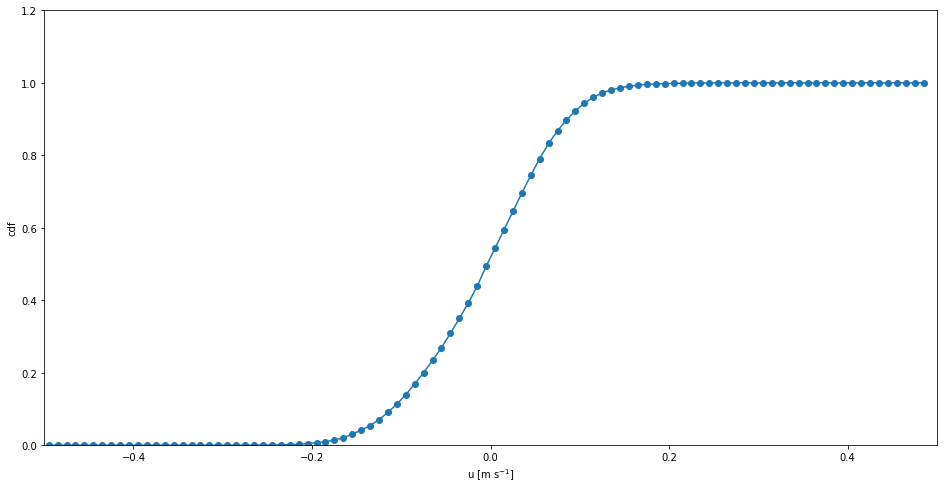

In [247]:
binwidth = 0.01
plt.figure(figsize=(16.0,8.0))

bins = np.arange(-.5,.5,binwidth)
x = 0.5*(bins[:-1]+bins[1:])
pdf = mypdf(u,bins)
cdf = np.cumsum(pdf*binwidth)
plt.plot(x,cdf,'-o');

plt.axis([-0.5,0.5,0,1.2])
plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('cdf')

plt.show()

 
99% chance in interval [ -0.20910000000003204 , 0.19899999999992302 ]
mean - 2.576*std -0.1973399102488118 mean + 2.576*std 0.19232547961586427
 
95% chance in interval [ -0.15510000000003799 , 0.13399999999993017 ]
mean - 1.96 std -0.15074948319977446 mean + 1.96 std 0.14573505256682692
 
68% chance in interval [ -0.08310000000004591 , 0.071999999999937 ]
mean - std -0.07814102546101495 mean + std 0.07312659482806738


<Figure size 432x288 with 0 Axes>

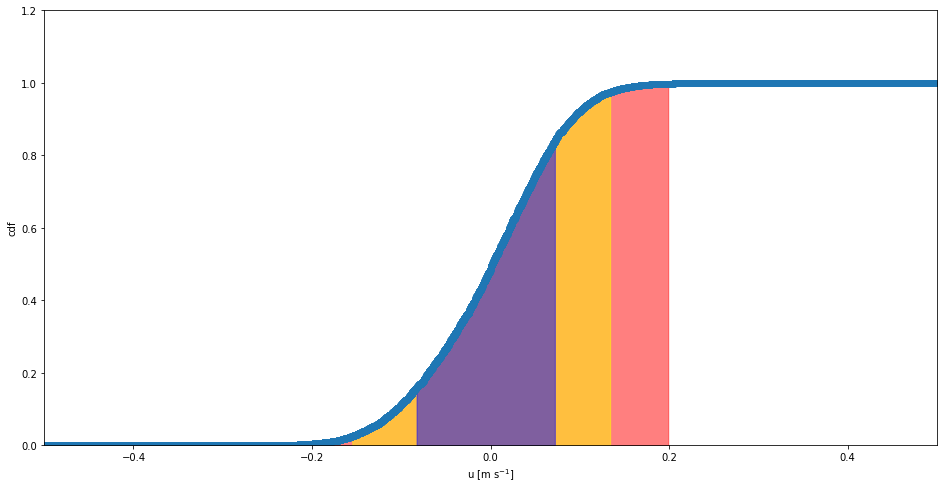

In [260]:
plt.clf()

##############
binwidth = 0.0001
plt.figure(figsize=(16.0,8.0))

bins = np.arange(-.5,.5,binwidth); x = 0.5*(bins[:-1]+bins[1:])

pdf = mypdf(u,bins)
cdf = np.cumsum(pdf*binwidth)

##############

plt.plot(x,cdf,'-o');

##############

# 8. Find interval where we have 68% chance of finding u

print ' '
per = 0.995
imin = np.max(np.where(cdf<=(1-per)/2))
imax = np.min(np.where(cdf>=1-(1-per)/2))
print '99% chance in interval [', bins[imin],',',bins[imax],']'
print 'mean - 2.576*std', np.mean(u)-2.576 *np.std(u), 'mean + 2.576*std', np.mean(u)+2.576*np.std(u)
plt.fill_between(x,cdf, 0, where=np.logical_and(cdf>=(1-per)/2,cdf<=1-(1-per)/2), alpha = 0.5, color='red'  )


print ' '
per = 0.95
imin = np.max(np.where(cdf<=(1-per)/2))
imax = np.min(np.where(cdf>=1-(1-per)/2))
print '95% chance in interval [', bins[imin],',',bins[imax],']'
print 'mean - 1.96 std', np.mean(u)-1.96*np.std(u), 'mean + 1.96 std', np.mean(u)+1.96*np.std(u)
plt.fill_between(x,cdf, 0, where=np.logical_and(cdf>=(1-per)/2,cdf<=1-(1-per)/2), alpha = 0.5 , color='yellow'  )

print ' '

per = 0.6827
imin = np.max(np.where(cdf<=(1-per)/2))
imax = np.min(np.where(cdf>=1-(1-per)/2))
print '68% chance in interval [', bins[imin],',',bins[imax],']'
print 'mean - std', np.mean(u)-np.std(u), 'mean + std', np.mean(u)+np.std(u)
plt.fill_between(x,cdf, 0, where=np.logical_and(cdf>=(1-per)/2,cdf<=1-(1-per)/2), alpha = 0.5 , color = 'blue')



#####################
plt.axis([-0.5,0.5,0,1.2])
plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('cdf')

plt.show()


# 2. Statistics

In [249]:
# 1. Compute the mean of u
print 'mean is', np.mean(u)
print 'mean is', np.sum(u)/N

mean is -0.002507215316473782
mean is -0.002507215316473782


In [210]:
# 2. Compute the median of u
print 'median is', np.median(u)

binwidth = 1e-5
bins = np.arange(-.5,.5,binwidth)
pdf = mypdf(u,bins)
cdf = np.cumsum(pdf*binwidth)
print 'median is', bins[np.min(np.where(cdf>=0.5))]

median is 0.002
median is 0.001990000000501979


In [250]:
# 3. Compute the biased standard deviation of u
print 'biased standard deviation is  ', np.std(u)

mu = np.sum(u)/N
print 'biased standard deviation is  ', np.sqrt(np.sum((u-mu)**2)/N)

# Compute the unbiased standard deviation of u
print 'unbiased standard deviation is', np.std(u,ddof=1)

mu = np.sum(u)/N
print 'unbiased standard deviation is', np.sqrt(np.sum((u-mu)**2)/(N-1))

biased standard deviation is   0.07563381014454117
biased standard deviation is   0.07563381014454117
unbiased standard deviation is 0.07563435046902062
unbiased standard deviation is 0.07563435046902062


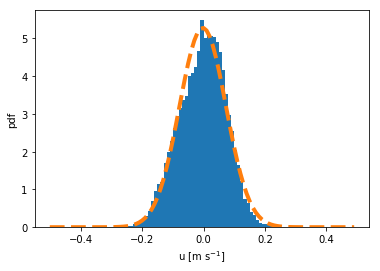

In [208]:
import scipy.stats

bins = np.arange(-.5,.5,0.01)
pdf = mypdf(u,bins)
#plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.hist(u,bins,density=1);
    
gauss = scipy.stats.norm.pdf(bins,np.mean(u),np.std(u))
plt.plot(bins,gauss,'--',linewidth=4);

plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('pdf')
plt.show()


In [206]:
# 4. Compute the biased skewness of u
from scipy.stats import skew
print 'biased skewness is  ', skew(u)

mu = np.sum(u)/N
sigma = np.sqrt(np.sum((u-mu)**2)/(N))
print 'biased skewness is  ', np.sum((u-mu)**3)/(N*sigma**3)

# Compute the unbiased skewness of u
print 'unbiased skewness is', skew(u,bias=False)

mu = np.sum(u)/N
sigma = np.sqrt(np.sum((u-mu)**2)/(N-1))
#print 'unbiased skewness is', np.sum((u-mu)**3)/((N-2)*sigma**3)
#print 'unbiased skewness is', (N * (N - 1)) ** 0.5 / (N - 1) * skew(u)
print 'unbiased skewness is', (N * (N - 1)) ** 0.5 / (N - 2) * skew(u)


biased skewness is   -0.172552663107
biased skewness is   -0.172552663106516
unbiased skewness is -0.172556361293
unbiased skewness is -0.172556361293


In [207]:
# 4. Compute the kurtosis of u
from scipy.stats import kurtosis
print 'kurtosis is  ', kurtosis(u)+3.

mu = np.sum(u)/N
sigma = np.sqrt(np.sum((u-mu)**2)/(N))
print 'kurtosis is  ', np.sum((u-mu)**4)/(N*sigma**4)

print ' '
print 'unbiased kurtosis is  ', kurtosis(u,bias=False)+3.

#mu = np.sum(u)/N
#sigma = np.sqrt(np.sum((u-mu)**2)/(N-1))
#print 'kurtosis is  ', np.sum((u-mu)**4)/((N-2)*sigma**4)

kurtosis is   2.78058705636
kurtosis is   2.7805870563598845
 
unbiased kurtosis is   2.78065711239


# 3. Normal distribution

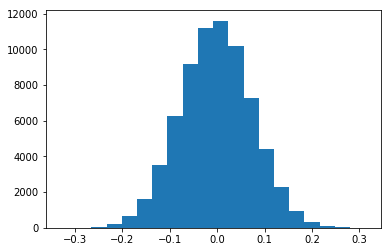

In [251]:
# 1. Generate a random variable following a normal distribution
N = len(u)
x = u.mean() + u.std() * np.random.randn(N)

_ = plt.hist(x,20)


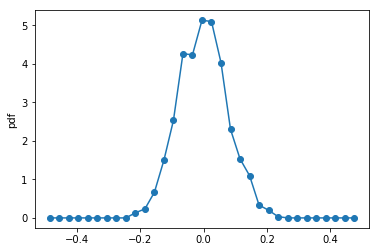

In [169]:
# 2. plot the pdf and compare to u
bins = np.arange(-.5,.5,0.03)
pdf = mypdf(x,bins)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.ylabel('pdf'); 
plt.show()

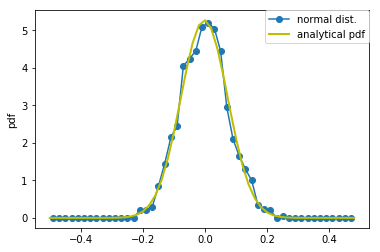

In [170]:
# 3. plot the pdf and compare to analytical pdf
bins = np.arange(-.5,.5,0.02)
pdf = mypdf(x,bins)
p1, = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
p2, = plt.plot(bins,1./np.sqrt(2*u.std()**2*np.pi)*np.exp(-(bins-u.mean())**2/(2*u.std()**2)),'-y',linewidth=2);
plt.ylabel('pdf'); plt.legend([p1,p2],['normal dist.','analytical pdf'],borderaxespad=0.)
plt.show()

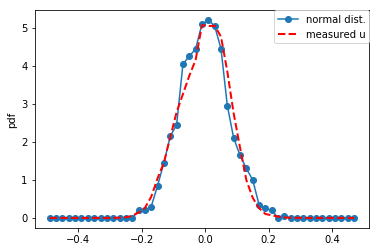

In [171]:
# 4. plot the pdf and compare to u
bins = np.arange(-.5,.5,0.02)
pdf = mypdf(x,bins)
p1, = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
pdf_u = mypdf(u,bins)
p2, = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf_u,'--r',linewidth=2);
plt.ylabel('pdf'); plt.legend([p1,p2],['normal dist.','measured u'],borderaxespad=0.)
plt.show()

In [172]:
print 'mean',x.mean(), '| std', x.std(),'| skew',skew(x),'| kurt',kurtosis(x)+3.
print 'mean',u.mean(), '| std', u.std(),'| skew',skew(u),'| kurt',kurtosis(u)+3.
# mean and std are identical by construction
# skewness of a true normal distribution is 0
# kurtosis of a true normal distribution is 3

mean -0.0022350304529848808 | std 0.07629516955125279 | skew 0.0892063854949 | kurt 2.91940861925
mean -0.002507215316473782 | std 0.07563381014454117 | skew -0.172552663107 | kurt 2.78058705636


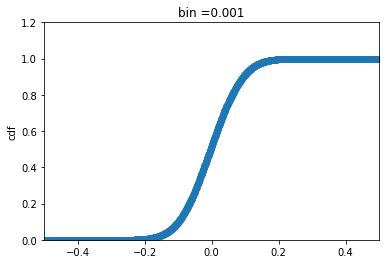

In [256]:
# 7. Compute the cummulated density function
binwidth = 0.001
bins = np.arange(-.5,.5,binwidth)
pdf = mypdf(x,bins)
cdf = np.cumsum(pdf*binwidth)
plt.plot(0.5*(bins[:-1]+bins[1:]),cdf,'-o');
plt.axis([-0.5,0.5,0,1.2])
plt.title('bin =' + format(binwidth))
plt.ylabel('cdf')
plt.show()

In [257]:
# 8. Find interval where we have 68% chance of finding u
binwidth = 0.0001
bins = np.arange(-.5,.5,binwidth)
pdf = mypdf(x,bins)
cdf = np.cumsum(pdf*binwidth)

per = 0.68
imin = np.max(np.where(cdf<=(1-per)/2))
imax = np.min(np.where(cdf>=1-(1-per)/2))
print '68% chance in interval [', bins[imin],',',bins[imax],']'

print ' '
per = 0.9545
imin = np.max(np.where(cdf<=(1-per)/2))
imax = np.min(np.where(cdf>=1-(1-per)/2))
print '95% chance in interval [', bins[imin],',',bins[imax],']'

print ' '
per = 0.9973
imin = np.max(np.where(cdf<=(1-per)/2))
imax = np.min(np.where(cdf>=1-(1-per)/2))
print '99% chance in interval [', bins[imin],',',bins[imax],']'

68% chance in interval [ -0.07770000000004651 , 0.0728999999999369 ]
 
95% chance in interval [ -0.15390000000003812 , 0.14879999999992854 ]
 
99% chance in interval [ -0.23180000000002954 , 0.22499999999992015 ]


In [255]:
print x.mean()-x.std(),x.mean()+x.std()
print x.mean()-2*x.std(),x.mean()+2*x.std()
print x.mean()-3*x.std(),x.mean()+3*x.std()


-0.07805729483718188 0.07317595718963829
-0.15367392085059198 0.14879258320304836
-0.22929054686400208 0.22440920921645846


## Normality tests

In [176]:
'''import scipy.stats

bins = np.arange(-.5,.5,0.01)
pdf = mypdf(u,bins)
#plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.hist(u,bins,density=1);
    
gauss = scipy.stats.norm.pdf(bins,np.mean(u),np.std(u))
plt.plot(bins,gauss,'--r',linewidth=4);


p2, = plt.plot(bins,1./np.sqrt(2*u.std()**2*np.pi)*np.exp(-(bins-u.mean())**2/(2*u.std()**2)),'-y',linewidth=2);

plt.xlabel('u [m s$^{-1}$]'); plt.ylabel('pdf')
plt.show()
'''

"import scipy.stats\n\nbins = np.arange(-.5,.5,0.01)\npdf = mypdf(u,bins)\n#plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');\nplt.hist(u,bins,density=1);\n    \ngauss = scipy.stats.norm.pdf(bins,np.mean(u),np.std(u))\nplt.plot(bins,gauss,'--r',linewidth=4);\n\n\np2, = plt.plot(bins,1./np.sqrt(2*u.std()**2*np.pi)*np.exp(-(bins-u.mean())**2/(2*u.std()**2)),'-y',linewidth=2);\n\nplt.xlabel('u [m s$^{-1}$]'); plt.ylabel('pdf')\nplt.show()\n"

In [142]:
x = u.mean() + u.std() * np.random.randn(N)

#x = u

In [139]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# generate univariate observations
data = x
#data = u
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)


In [140]:


# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# generate univariate observations

# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

    

Statistics=520.010, p=0.000
Sample does not look Gaussian (reject H0)


In [141]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
data = x
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 98.192
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [145]:
np.int(5.)

5